# **Control Assignment**

### **Required task**


1. Plot the step response for the uncontrolled system (already given as an example)
2. Design a P controller $f = K_p \cdot error$ which render the system critically damped, plot the step response of the system.

Please check the following document for coding with python-control package:
https://python-control.readthedocs.io/en/0.10.0/

## **Initial Setup**

First, install the `control` package in Python.

In [2]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.9/513.9 kB 3.1 MB/s eta 0:00:00


## **Details**

Import the `control`, `numpy` and `matplotlib` packages.

In [3]:
import control as co
import numpy as np
import matplotlib.pyplot as plt
import math

### **Defining the uncontrolled system**

Define a transfer function $G_1(s)=\dfrac{1}{4s^2+2s+1}$ with

In [26]:
G1 = co.tf([1], [4, 2, 1])
print(G1)

<TransferFunction>: sys[77]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


       1
---------------
4 s^2 + 2 s + 1



Step response

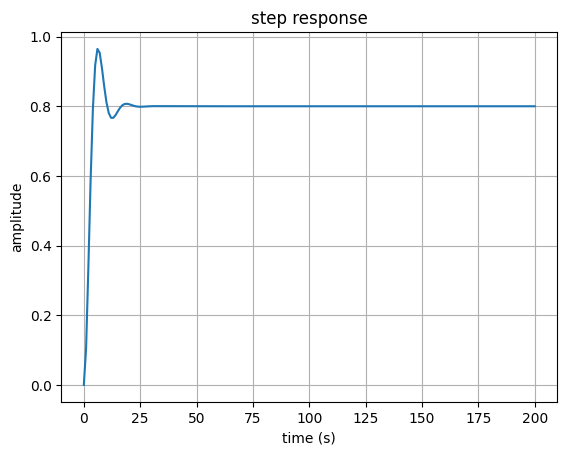

In [5]:
t = np.linspace(0, 200, 200) # time is taken from 0s to 10s
_, y = co.step_response(G1, t) # calculate the step response of G1

plt.plot(t, y) # plot the response
plt.xlabel('time (s)') # labels
plt.ylabel('amplitude') # labels
plt.title('step response') # title
plt.grid() # grid

### **Please implement your controller and plot the step response below**

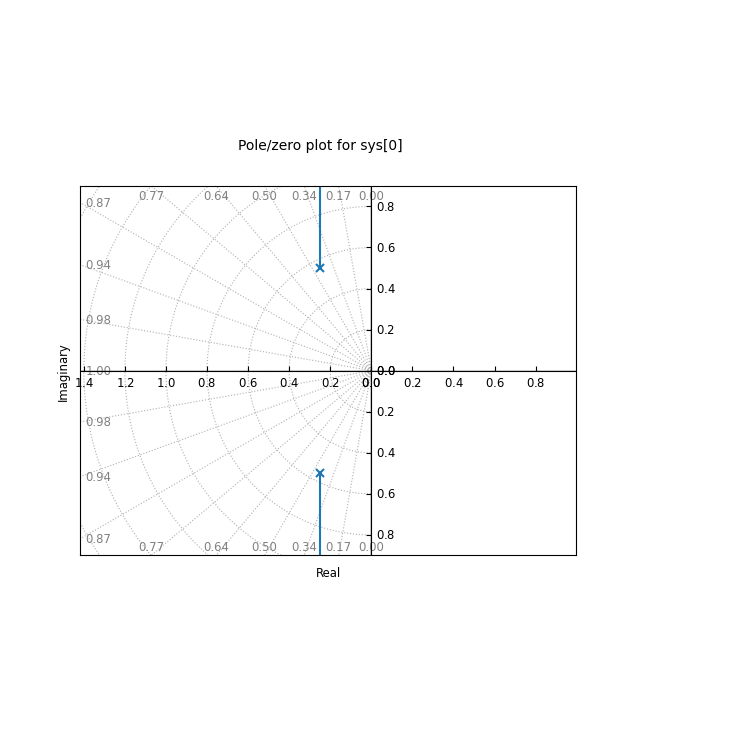

In [6]:
co.root_locus_plot(G1)
#root locus shows no possible roots with damping angle of 0

array([[list([<matplotlib.lines.Line2D object at 0x7ab79f7b7f10>]),
        list([<matplotlib.lines.Line2D object at 0x7ab79f7b69b0>]),
        list([<matplotlib.lines.Line2D object at 0x7ab79f7f8730>, <matplotlib.lines.Line2D object at 0x7ab79f7f8c70>])]],
      dtype=object)

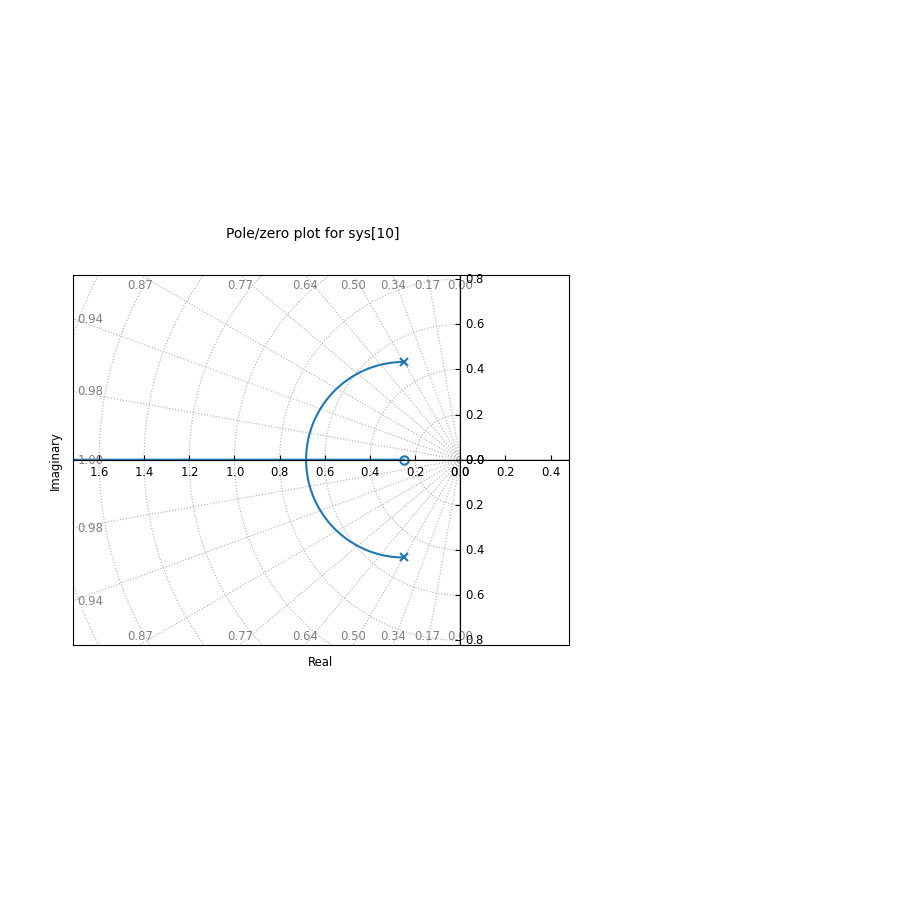

In [10]:
#try adding a zero at s = -0.25 to make a PD controller
G1H1 = co.tf([1, 0.25],[4, 2, 1])
co.root_locus_plot(G1H1)

<TransferFunction>: sys[43]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


    3.464 s + 0.866
-----------------------
4 s^2 + 5.464 s + 1.866

<TransferFunction>: sys[47]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


    3.464 s + 0.866
-----------------------
4 s^2 + 5.464 s + 1.866



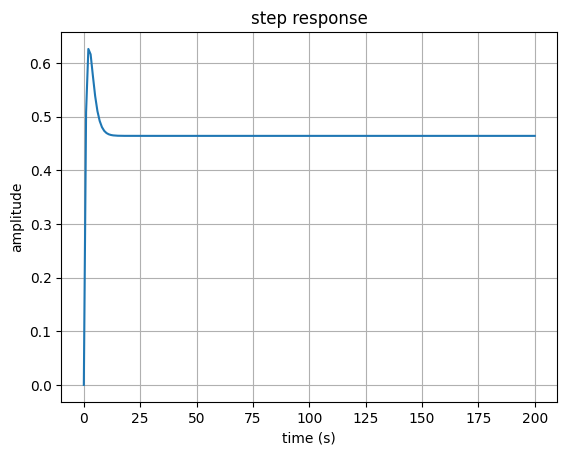

In [19]:
#then add gain to PD controller & close the loop:
#from manual calculations:
T1=co.tf([2*math.sqrt(3),math.sqrt(3)/2],[4,(2+2*math.sqrt(3)),(1+math.sqrt(3)/2)])
print(T1)

#this can also be done using the control.feedback() function
H1 = co.tf([2*math.sqrt(3),math.sqrt(3)/2],[1])
L1=G1*H1
T1_fb = co.feedback(L1)
print(T1_fb)

t = np.linspace(0, 200, 200) # time is taken from 0s to 10s
_, y = co.step_response(T1, t) # calculate the step response of G1

plt.plot(t, y) # plot the response
plt.xlabel('time (s)') # labels
plt.ylabel('amplitude') # labels
plt.title('step response') # title
plt.grid() # grid

Step response still shows overshoot, and high steady-state error. Try proportional controller calculated algebraically instead.

<TransferFunction>: sys[89]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      -0.75
------------------
4 s^2 + 2 s + 0.25

<TransferFunction>: sys[93]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      -0.75
------------------
4 s^2 + 2 s + 0.25



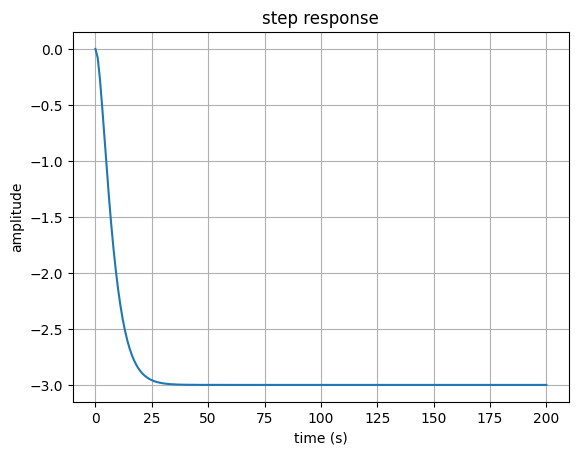

In [29]:
#proportional controller calculated algebraically is K_p = -0.75
#closed loop proportionally controlled transfer function calculated algebraically:
T_p = co.tf([-0.75],[4,2,0.25])
print(T_p)

#and calculated using the feedback function in the python control library:
K_p = co.tf([-0.75],[1])
L_p = K_p * G1
T_p_fb = co.feedback(L_p)
print(T_p_fb)

t = np.linspace(0, 200, 200) # time is taken from 0s to 10s
_, y = co.step_response(T_p_fb, t) # calculate the step response of G1

plt.plot(t, y) # plot the response
plt.xlabel('time (s)') # labels
plt.ylabel('amplitude') # labels
plt.title('step response') # title
plt.grid() # grid

There is no longer any overshoot in the step response, however the final value is -3, much different to the uncontrolled system.